In [1]:
import numpy as np

num_features = 2
loc = 1
scale = 0.5

x_train = np.vstack([np.random.normal(size=(9000, num_features)), np.random.normal(loc=loc, scale=scale, size=(1000, num_features))])
x_train.shape

(10000, 2)

In [2]:
y_train = np.hstack([np.zeros((9000,)), np.ones((1000,))])
y_train.shape

(10000,)

In [3]:
x_test = np.vstack([np.random.normal(size=(900, num_features)), np.random.normal(loc=loc, scale=scale, size=(100, num_features))])
x_test.shape

(1000, 2)

In [4]:
y_test = np.hstack([np.zeros((900,)), np.ones((100,))])
y_test.shape

(1000,)

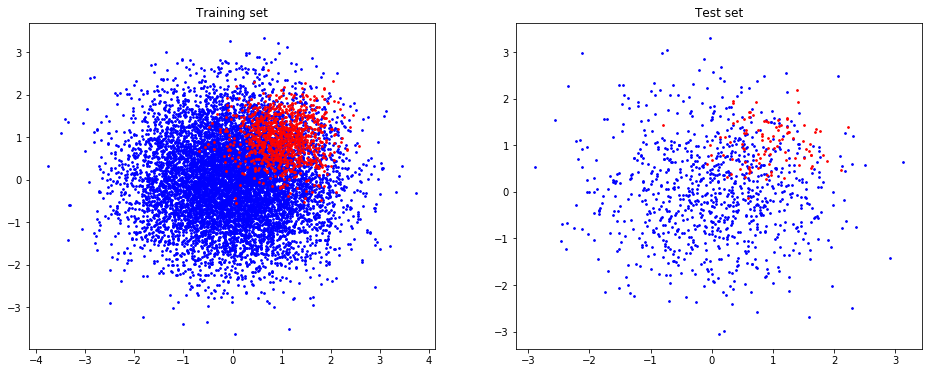

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("Training set")
plt.subplot(1, 2, 2)
plt.scatter(x_test[:900, 0], x_test[:900, 1], s=3, c='b')
plt.scatter(x_test[900:, 0], x_test[900:, 1], s=3, c='r')
plt.title("Test set")

In [6]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras.backend as K

def auc(y_true, y_pred):
    y_true_1 = tf.equal(y_true, 1)
    y_true_0 = tf.equal(y_true, 0)
    a = tf.boolean_mask(y_pred, y_true_1)
    b = tf.boolean_mask(y_pred, y_true_0)
    return K.mean(a[None, :] > b[:, None])

Using TensorFlow backend.


In [7]:
model = Sequential()
model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', auc])

In [8]:
model.fit(x_train, y_train, batch_size=100, epochs=100, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 1s - loss: 0.4708 - acc: 0.8576 - auc: 0.6082 - val_loss: 0.3258 - val_acc: 0.9000 - val_auc: nan
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.2715 - acc: 0.9000 - auc: 0.8982 - val_loss: 0.2371 - val_acc: 0.9000 - val_auc: nan
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.2202 - acc: 0.8999 - auc: 0.9179 - val_loss: 0.2121 - val_acc: 0.9060 - val_auc: nan
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.2059 - acc: 0.8995 - auc: 0.9210 - val_loss: 0.2039 - val_acc: 0.9050 - val_auc: nan
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.2013 - acc: 0.8987 - auc: 0.9187 - val_loss: 0.2007 - val_acc: 0.9070 - val_auc: nan
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 0.1989 - acc: 0.8996 - auc: 0.9205 - val_loss: 0.1991 - val_acc: 0.9010 - val_auc: nan
Epoch 7/1

10000/10000 [==============================] - 0s - loss: 0.1904 - acc: 0.9061 - auc: 0.9251 - val_loss: 0.1966 - val_acc: 0.9100 - val_auc: nan
Epoch 53/100
10000/10000 [==============================] - 0s - loss: 0.1904 - acc: 0.9046 - auc: 0.9222 - val_loss: 0.1965 - val_acc: 0.9050 - val_auc: nan
Epoch 54/100
10000/10000 [==============================] - 0s - loss: 0.1904 - acc: 0.9054 - auc: 0.9240 - val_loss: 0.1963 - val_acc: 0.9020 - val_auc: nan
Epoch 55/100
10000/10000 [==============================] - 0s - loss: 0.1902 - acc: 0.9051 - auc: 0.9263 - val_loss: 0.1963 - val_acc: 0.9030 - val_auc: nan
Epoch 56/100
10000/10000 [==============================] - 0s - loss: 0.1901 - acc: 0.9047 - auc: 0.9242 - val_loss: 0.1964 - val_acc: 0.9040 - val_auc: nan
Epoch 57/100
10000/10000 [==============================] - 0s - loss: 0.1902 - acc: 0.9059 - auc: 0.9250 - val_loss: 0.1965 - val_acc: 0.9050 - val_auc: nan
Epoch 58/100
10000/10000 [==============================] - 0s - 

In [9]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.5, y_test)

array([[871,  69],
       [ 29,  31]])

In [10]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.91854444444444439

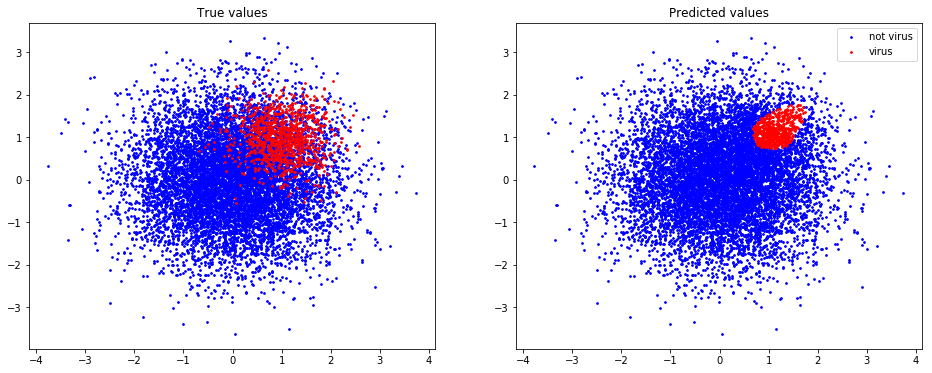

In [20]:
y_pred = model.predict(x_train)
x_true = x_train[y_pred[:, 0] > 0.5, :]
x_false = x_train[y_pred[:, 0] <= 0.5, :]

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("True values")
plt.subplot(1, 2, 2)
plt.scatter(x_false[:, 0], x_false[:, 1], s=3, c='b')
plt.scatter(x_true[:, 0], x_true[:, 1], s=3, c='r')
plt.legend(['not virus', 'virus'])
plt.title("Predicted values")

In [37]:
model = Sequential()
model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', auc])

In [38]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight

array([ 0.55555556,  5.        ])

In [39]:
model.fit(x_train, y_train, batch_size=100, epochs=100, validation_data=(x_test, y_test), class_weight=class_weight)

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: 0.4436 - acc: 0.8972 - auc: 0.6571 - val_loss: 0.3136 - val_acc: 0.9000 - val_auc: nan
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.2598 - acc: 0.8994 - auc: 0.9020 - val_loss: 0.2288 - val_acc: 0.8990 - val_auc: nan
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.2140 - acc: 0.8990 - auc: 0.9173 - val_loss: 0.2077 - val_acc: 0.9070 - val_auc: nan
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.2030 - acc: 0.8995 - auc: 0.9193 - val_loss: 0.2026 - val_acc: 0.9030 - val_auc: nan
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.1997 - acc: 0.8988 - auc: 0.9204 - val_loss: 0.1997 - val_acc: 0.9040 - val_auc: nan
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 0.1978 - acc: 0.8994 - auc: 0.9216 - val_loss: 0.1989 - val_acc: 0.9070 - val_auc: nan
Epoch 7/1

10000/10000 [==============================] - 0s - loss: 0.1905 - acc: 0.9062 - auc: 0.9252 - val_loss: 0.1970 - val_acc: 0.9050 - val_auc: nan
Epoch 53/100
10000/10000 [==============================] - ETA: 0s - loss: 0.1914 - acc: 0.9055 - auc: 0.922 - 0s - loss: 0.1904 - acc: 0.9058 - auc: 0.9221 - val_loss: 0.1966 - val_acc: 0.9060 - val_auc: nan
Epoch 54/100
10000/10000 [==============================] - 0s - loss: 0.1906 - acc: 0.9057 - auc: 0.9248 - val_loss: 0.1967 - val_acc: 0.9040 - val_auc: nan
Epoch 55/100
10000/10000 [==============================] - 0s - loss: 0.1904 - acc: 0.9052 - auc: 0.9242 - val_loss: 0.1964 - val_acc: 0.9070 - val_auc: nan
Epoch 56/100
10000/10000 [==============================] - 0s - loss: 0.1903 - acc: 0.9069 - auc: 0.9240 - val_loss: 0.1966 - val_acc: 0.9090 - val_auc: nan
Epoch 57/100
10000/10000 [==============================] - 0s - loss: 0.1901 - acc: 0.9057 - auc: 0.9257 - val_loss: 0.1966 - val_acc: 0.9060 - val_auc: nan
Epoch 58/100


In [40]:
y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.5, y_test)

array([[870,  71],
       [ 30,  29]])

In [41]:
roc_auc_score(y_test, y_pred)

0.91804444444444433

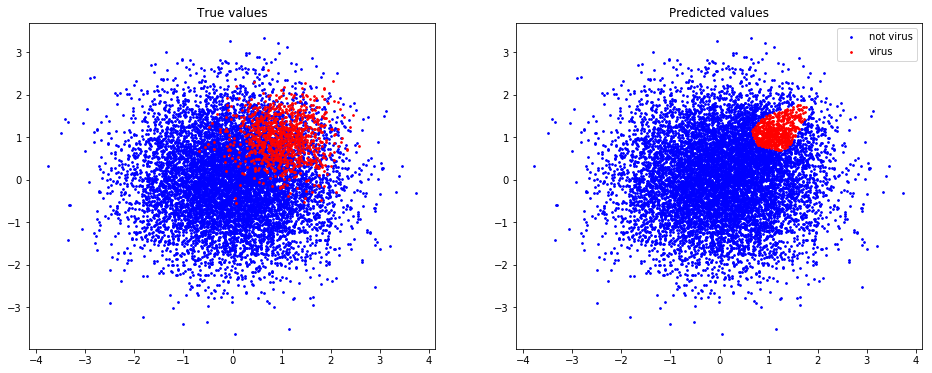

In [42]:
y_pred = model.predict(x_train)
x_true = x_train[y_pred[:, 0] > 0.5, :]
x_false = x_train[y_pred[:, 0] <= 0.5, :]

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("True values")
plt.subplot(1, 2, 2)
plt.scatter(x_false[:, 0], x_false[:, 1], s=3, c='b')
plt.scatter(x_true[:, 0], x_true[:, 1], s=3, c='r')
plt.legend(['not virus', 'virus'])
plt.title("Predicted values")

In [43]:
model = Sequential()
model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

from utils import sample_binomial
from keras.losses import binary_crossentropy

def reinforce_loss(y_true, y_pred):
    y_samp = sample_binomial(y_pred)
    rewards = auc(y_true, y_samp)
    baseline = auc(y_true, y_pred)
    advantages = rewards - baseline
    return advantages * binary_crossentropy(y_samp, y_pred)

model.compile(loss=reinforce_loss, optimizer='adam', metrics=['accuracy', auc])

In [44]:
model.fit(x_train, y_train, batch_size=100, epochs=100, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: -0.2034 - acc: 0.7242 - auc: 0.5519 - val_loss: nan - val_acc: 0.6750 - val_auc: nan
Epoch 2/100
10000/10000 [==============================] - 0s - loss: -0.3410 - acc: 0.5416 - auc: 0.7426 - val_loss: nan - val_acc: 0.5610 - val_auc: nan
Epoch 3/100
10000/10000 [==============================] - 0s - loss: -0.4213 - acc: 0.6397 - auc: 0.9046 - val_loss: nan - val_acc: 0.7240 - val_auc: nan
Epoch 4/100
10000/10000 [==============================] - 0s - loss: -0.3728 - acc: 0.7503 - auc: 0.9031 - val_loss: nan - val_acc: 0.7190 - val_auc: nan
Epoch 5/100
10000/10000 [==============================] - 0s - loss: -0.3373 - acc: 0.7104 - auc: 0.9116 - val_loss: nan - val_acc: 0.7300 - val_auc: nan
Epoch 6/100
10000/10000 [==============================] - 0s - loss: -0.2982 - acc: 0.7613 - auc: 0.9111 - val_loss: nan - val_acc: 0.7550 - val_auc: nan
Epoch 7/100
10000/100

10000/10000 [==============================] - 0s - loss: -0.0398 - acc: 0.8137 - auc: 0.9144 - val_loss: nan - val_acc: 0.7940 - val_auc: nan
Epoch 53/100
10000/10000 [==============================] - 0s - loss: -0.0370 - acc: 0.8088 - auc: 0.9137 - val_loss: nan - val_acc: 0.7930 - val_auc: nan
Epoch 54/100
10000/10000 [==============================] - 0s - loss: -0.0366 - acc: 0.8141 - auc: 0.9156 - val_loss: nan - val_acc: 0.8030 - val_auc: nan
Epoch 55/100
10000/10000 [==============================] - 0s - loss: -0.0373 - acc: 0.8218 - auc: 0.9151 - val_loss: nan - val_acc: 0.8230 - val_auc: nan
Epoch 56/100
10000/10000 [==============================] - 0s - loss: -0.0413 - acc: 0.8479 - auc: 0.9150 - val_loss: nan - val_acc: 0.8560 - val_auc: nan
Epoch 57/100
10000/10000 [==============================] - 0s - loss: -0.0362 - acc: 0.8460 - auc: 0.9144 - val_loss: nan - val_acc: 0.8200 - val_auc: nan
Epoch 58/100
10000/10000 [==============================] - 0s - loss: -0.034

In [45]:
y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.5, y_test)

array([[640,   3],
       [260,  97]])

In [46]:
roc_auc_score(y_test, y_pred)

0.90564444444444447

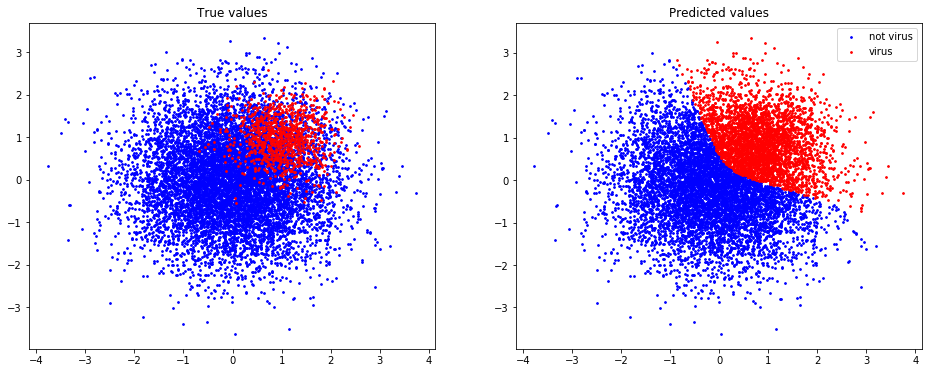

In [47]:
y_pred = model.predict(x_train)
x_true = x_train[y_pred[:, 0] > 0.5, :]
x_false = x_train[y_pred[:, 0] <= 0.5, :]

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("True values")
plt.subplot(1, 2, 2)
plt.scatter(x_false[:, 0], x_false[:, 1], s=3, c='b')
plt.scatter(x_true[:, 0], x_true[:, 1], s=3, c='r')
plt.legend(['not virus', 'virus'])
plt.title("Predicted values")

In [52]:
model = Sequential()
model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

def auc_loss(y_true, y_pred):
    y_true_1 = tf.equal(y_true[:, 0], 1)
    y_true_0 = tf.equal(y_true[:, 0], 0)
    prob_1 = tf.boolean_mask(y_pred, y_true_1)
    prob_0 = tf.boolean_mask(y_pred, y_true_0)
    agtb = tf.cast(prob_1[:, None] > prob_0[None, :], tf.float32)
    rewards_1 = tf.reduce_mean(agtb, axis=1)
    rewards_0 = tf.reduce_mean(agtb, axis=0)
    advantages_1 = 1 - rewards_1
    advantages_0 = 1 - rewards_0
    return tf.reduce_mean(advantages_1 * -tf.log(prob_1)) + tf.reduce_mean(advantages_0 * tf.log(prob_0))

model.compile(loss=auc_loss, optimizer='adam', metrics=['accuracy', auc])
#model.fit(x_train[9000-5:9000+5], y_train[9000-5:9000+5], batch_size=10, epochs=1, shuffle=False)

In [53]:
model.fit(x_train, y_train, batch_size=100, epochs=100, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: 0.0022 - acc: 0.3455 - auc: 0.8873 - val_loss: nan - val_acc: 0.2060 - val_auc: nan
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 1.9277e-04 - acc: 0.1319 - auc: 0.8882 - val_loss: nan - val_acc: 0.1010 - val_auc: nan
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 1.9266e-04 - acc: 0.1007 - auc: 0.8850 - val_loss: nan - val_acc: 0.1000 - val_auc: nan
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 1.2111e-04 - acc: 0.1000 - auc: 0.8948 - val_loss: nan - val_acc: 0.1000 - val_auc: nan
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 2.0528e-04 - acc: 0.1019 - auc: 0.8821 - val_loss: nan - val_acc: 0.1000 - val_auc: nan
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 2.7377e-04 - acc: 0.1002 - auc: 0.8814 - val_loss: nan - val_acc: 0.1000 - val_auc: nan
Epoch 7

10000/10000 [==============================] - 0s - loss: 3.4105e-05 - acc: 0.1000 - auc: 0.8956 - val_loss: nan - val_acc: 0.1000 - val_auc: nan
Epoch 53/100
10000/10000 [==============================] - 0s - loss: 2.5615e-05 - acc: 0.1000 - auc: 0.9034 - val_loss: nan - val_acc: 0.1000 - val_auc: nan
Epoch 54/100
10000/10000 [==============================] - 0s - loss: 3.3864e-05 - acc: 0.1000 - auc: 0.8966 - val_loss: nan - val_acc: 0.1000 - val_auc: nan
Epoch 55/100
10000/10000 [==============================] - 0s - loss: 2.2142e-05 - acc: 0.1000 - auc: 0.9011 - val_loss: nan - val_acc: 0.1000 - val_auc: nan
Epoch 56/100
10000/10000 [==============================] - 0s - loss: 2.7477e-05 - acc: 0.1000 - auc: 0.9008 - val_loss: nan - val_acc: 0.1000 - val_auc: nan
Epoch 57/100
10000/10000 [==============================] - 0s - loss: 1.8764e-05 - acc: 0.1000 - auc: 0.9031 - val_loss: nan - val_acc: 0.1000 - val_auc: nan
Epoch 58/100
10000/10000 [==============================] -

In [74]:
y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.9785, y_test)

array([[744,  19],
       [156,  81]])

In [55]:
roc_auc_score(y_test, y_pred)

0.88541666666666652

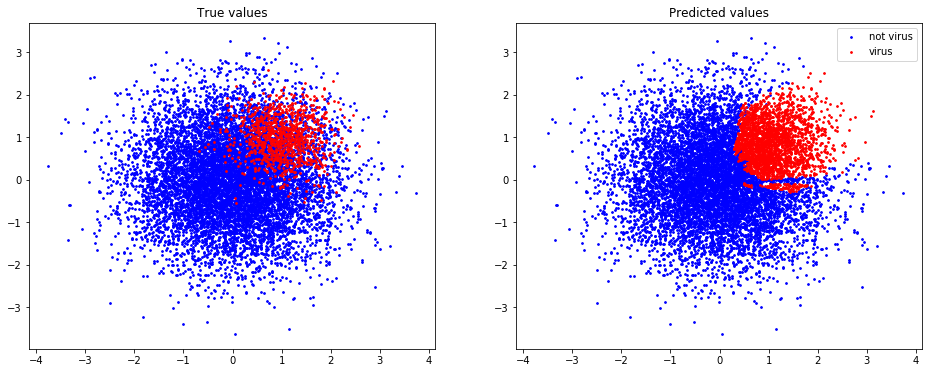

In [75]:
y_pred = model.predict(x_train)
x_true = x_train[y_pred[:, 0] > 0.9785, :]
x_false = x_train[y_pred[:, 0] <= 0.9785, :]

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("True values")
plt.subplot(1, 2, 2)
plt.scatter(x_false[:, 0], x_false[:, 1], s=3, c='b')
plt.scatter(x_true[:, 0], x_true[:, 1], s=3, c='r')
plt.legend(['not virus', 'virus'])
plt.title("Predicted values")